## 뉴런을 만들어봅니다

In [4]:
import matplotlib.pyplot as plt

In [8]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [9]:
x = diabetes.data[:, 2]
y = diabetes.target

In [10]:
class Neuron:
    
    def __init__(self):
        self.w = 1.0     # 가중치를 초기화합니다
        self.b = 1.0     # 절편을 초기화합니다
                         # 함수 호출시 기본값으로 지정됨
    
    def forpass(self, x):
        y_hat = x * self.w + self.b       # 직선 방정식을 계산합니다
        return y_hat
    
    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def fit(self, x, y, epochs=100):
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                y_hat = self.forpass(x_i) # 정방향 계산
                err = -(y_i - y_hat)      # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= w_grad          # 가중치 업데이트
                self.b -= b_grad          # 절편 업데이트

#batch_size 는 한번에 불러오는 데이터의 갯수,
#batch_size의 단위에 다라 w,b 의 갱신이 이루어진다.
#epochs 하나당 w, b 한번씩 갱신

- batch_size 는 한번에 불러오는 데이터의 갯수,
  - batch_size의 범위에 다라 w,b 의 갱신이 이루어진다.( ex) batch_size =1, 총 데이터 갯수 = 6 이면 w,b 갱신 횟수는 6회, batch_size = 3이면, 갱신횟수 2회
  
  
- epochs 하나당 w, b 한번씩 갱신

- epochs 기본 값은 1, batch_size의 기본값은 32


- 옵티메이저 = 어느정도 움직일것인가? 위 뉴런 클래스는 옵티마이저 까지 직접 만든것, 미분을 수행하는 방법이 약간 다르게 나온다.
  - 각각의 옵티마이저 안에는 러닝레이트를 얼마로 할것인가를 선택 가능하다.
  - 배치 사이즈는 작게 에포크는 크게 하면 많이 실행하지만,
  - 많이 실행하려면, 러닝레이트를 작게 해야 한다.
  - 너무 많이 실행되는 경우에는 가지치기를 해줘야 한다.

In [11]:
neuron = Neuron()
neuron.fit(x, y)

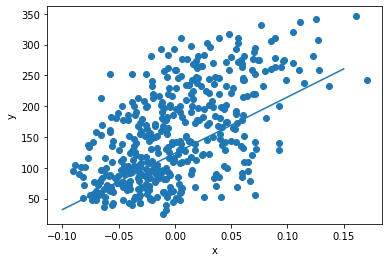

In [13]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()